In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
matches = pd.read_csv('./data/matches/results.csv')
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [25]:
matches.info()
matches.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44206 entries, 0 to 44205
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        44206 non-null  object 
 1   home_team   44206 non-null  object 
 2   away_team   44206 non-null  object 
 3   home_score  44164 non-null  float64
 4   away_score  44164 non-null  float64
 5   tournament  44206 non-null  object 
 6   city        44206 non-null  object 
 7   country     44206 non-null  object 
 8   neutral     44206 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.7+ MB


,home_score,away_score
count,44164.000000,44164.000000
mean,1.739494,1.178109
std,1.746572,1.394421
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [26]:
# Identifying numeric columns
numeric_cols = matches.select_dtypes(include=['number']).columns
print('Numeric columns: ', numeric_cols)

# Identifying non-numeric columns
non_numeric_cols = matches.select_dtypes(exclude=['number']).columns
print('Non numeric columns: ', non_numeric_cols)

Numeric columns:  Index(['home_score', 'away_score'], dtype='object')
Non numeric columns:  Index(['date', 'home_team', 'away_team', 'tournament', 'city', 'country',
       'neutral'],
      dtype='object')


In [27]:
# columns and number of missing values
num_missing = matches.isna().sum()
num_missing[:]

date           0
home_team      0
away_team      0
home_score    42
away_score    42
tournament     0
city           0
country        0
neutral        0
dtype: int64

<AxesSubplot: >

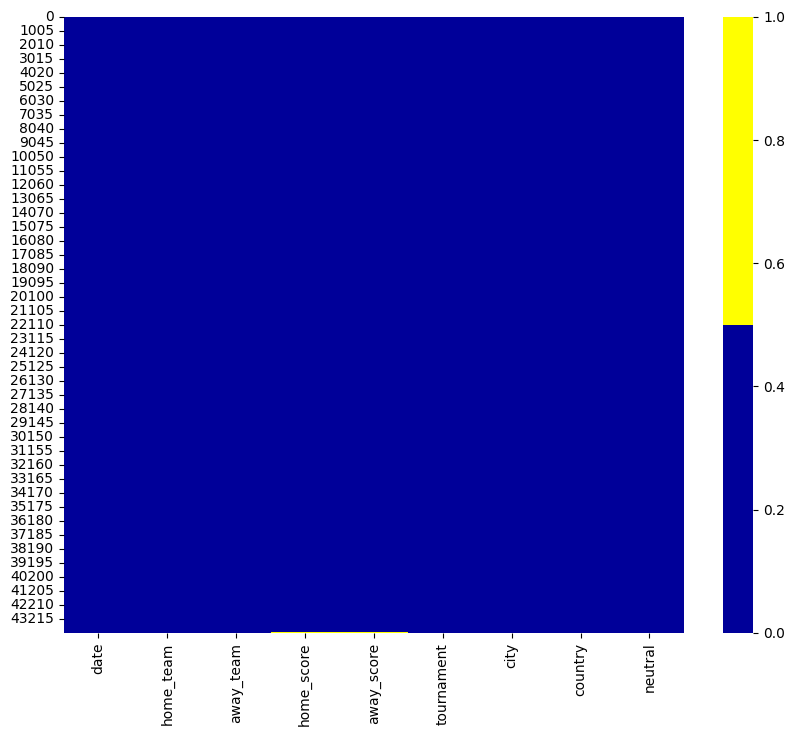

In [28]:
# Heatmap to visualize missing data
plt.figure(figsize=(10,8))

# first 30 columns
cols = matches.columns[:30]
colours =['#000099', '#ffff00']
sns.heatmap(matches[cols].isna(), cmap=sns.color_palette(colours))

In [29]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [30]:
matches[matches['home_score'].isna()].index

Int64Index([44163, 44165, 44166, 44167, 44168, 44169, 44170, 44171, 44172,
            44173, 44174, 44175, 44176, 44177, 44178, 44179, 44180, 44181,
            44182, 44183, 44184, 44185, 44186, 44187, 44188, 44189, 44190,
            44191, 44192, 44193, 44194, 44195, 44196, 44197, 44198, 44199,
            44200, 44201, 44202, 44203, 44204, 44205],
           dtype='int64')

In [31]:
matches.drop(matches[matches['home_score'].isna()].index, inplace=True)

In [32]:
matches.reset_index(inplace=True)

In [33]:
matches

,index,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...,...
44159,44159,2022-11-21,Senegal,Netherlands,0.0,2.0,FIFA World Cup,Doha,Qatar,True
44160,44160,2022-11-21,England,Iran,6.0,2.0,FIFA World Cup,Al Rayyan,Qatar,True
44161,44161,2022-11-21,United States,Wales,1.0,1.0,FIFA World Cup,Al Rayyan,Qatar,True
44162,44162,2022-11-22,Argentina,Saudi Arabia,1.0,2.0,FIFA World Cup,Lusail,Qatar,True


In [34]:
# insert match_id
matches.insert(0,"match_id", matches.index+1)
matches['date'] = pd.to_datetime(matches['date'])

In [35]:
matches['home_team'] = matches['home_team'].replace('Brunei Darussalam', 'Brunei')

In [36]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44164 entries, 0 to 44163
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   match_id    44164 non-null  int64         
 1   index       44164 non-null  int64         
 2   date        44164 non-null  datetime64[ns]
 3   home_team   44164 non-null  object        
 4   away_team   44164 non-null  object        
 5   home_score  44164 non-null  float64       
 6   away_score  44164 non-null  float64       
 7   tournament  44164 non-null  object        
 8   city        44164 non-null  object        
 9   country     44164 non-null  object        
 10  neutral     44164 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 3.4+ MB


In [37]:
matches.to_csv('./data/matches.csv', index=False)